
		MAIN MENU
1) View a month's spendings analytics.
2) Print a month's spendings datasheet.
3) View the progression spending of past months.
4) Exit program.

Choose either option 1 to 4: 1
Which month's analytics do you want to view?
(i.e. 'nov_2021'): jun_2022


********************************************

	Analytics for June 2022

********************************************

Total spent in June: £1337.51

Spendings from highest to lowest
-----------------------------------
1. | Rent		| £755.82
-----------------------------------
2. | Food		| £107.31
-----------------------------------
3. | Leisure		| £103.39
-----------------------------------
4. | Grocery		| £73.77
-----------------------------------
5. | Shopping		| £72.94
-----------------------------------
6. | b./tax		| £70.71
-----------------------------------
7. | Trans.		| £53.35
-----------------------------------
8. | Other		| £44.03
-----------------------------------
9. | Subscr.		| £30.99
----------------------------

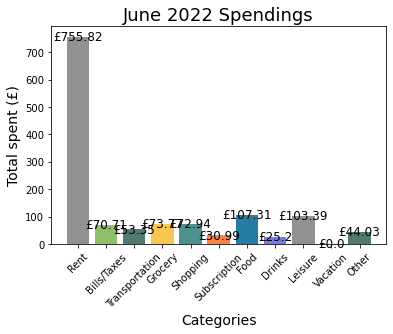


		MAIN MENU
1) View a month's spendings analytics.
2) Print a month's spendings datasheet.
3) View the progression spending of past months.
4) Exit program.


In [ ]:
import pandas as pd  # For dataframes
import matplotlib.pyplot as plt  # For graphs


path = "/Users/LucaSantarelli/Desktop/spendings/spendings.xls"
    
# These functions are used to add a new expense entry (NOT INCLUDED).
# --------------------------------------------------------------------

# def add_expense(sheet):
#     """Adds a new expense entry to the sheet of the chosen month."""
    
#     try:
#         month = pd.read_excel(path, sheet_name=sheet)
#     except ValueError:
#         print(f"Unable to find the sheet with the name '{sheet}'!\n")
#     else:
#         date = month_year(sheet)
#         while True:
#             categories = {}
#             categories['Amount'] = input("Cost of expense: ")
#             categories['Location'] = input("Location of expense: ")
#             categories['Category'] = expense_category()
#             categories['Date'] = input("Date of expense (format: DD/MM/YYYY): ")
#             df_to_save = pd.DataFrame(categories, index=[0])
#             writer = pd.ExcelWriter(path)
#             df_to_save.to_excel(writer, sheet)
#             choice = input("\nSUCCESS! Do you want to add another expense? (y/n)")
#             if choice == 'n':
#                 break
            
#             print("\n")
            
            

# def expense_category():            
#     """Returns the category of the expense."""
    
#     categories = {
#                   1: 'Grocery',
#                   2: 'Transportation',
#                   3: 'Food',
#                   4: 'Shopping',
#                   5: 'Leisure', 
#                   6: 'Drinks',
#                   7: 'Other'
#                  }
    
#     print("\t\t\nCategory Menu")
#     print("1) Grocery")
#     print("2) Transportation")
#     print("3) Food")
#     print("4) Shopping")
#     print("5) Leisure")
#     print("6) Drinks")
#     print("7) Other")
    
#     while True:
#         cat = input("Choose a category from 1 to 7: ")
#         if ord(cat) < 49 or ord(cat) > 55:
#             print("-- Invalid category! --")
#         else:
#             break
    
#     return categories[int(cat)]
# --------------------------------------------------------------------



def check_error(sheet):
    """Check if the chosen sheet can be opened or not."""

    try:
        month = pd.read_excel(path, sheet_name=sheet)
    except ValueError:
        print(f"Unable to find the sheet with the name '{sheet}'\n")
        return (False,)
    else:
        date = month_year(sheet)
        return (True, month, date)
    
    
    
def month_year(sheet):
    """Function returning the requested month and related year."""

    months = ['January', 'February', 'March', 'April', 'May',
             'June', 'July', 'August', 'September', 'October',
             'November', 'December']
    x = sheet.split('_')

    for month in months:
        if x[0] in month.lower():
            return (month, x[1])

    

def spendings(sheet):
    """Retrieve the datasheet of the chosen month and display its analytics."""
    
    res = check_error(sheet)
    if res[0] == True:
        date = res[2]
        print_analytics(res[1], date)
    else:
        return
    

    
def view_month_datasheet(sheet):
    """Print the complete spendings datasheet of the chosen month."""

    res = check_error(sheet)
    if res[0] == True:
        date = res[2]
        print("\n")
        print(f"\t\t\n{date[0]} {date[1]} Complete Spendings Datasheet")
        print("-------------------------------------------------------")
        print(res[1])
        print("-------------------------------------------------------\n") 

    else:
        return   
    
    
    
def print_analytics(spendings, date):
    """Function calling other functions to display the analytics."""
    
    print("\n")
    print("********************************************\n")
    print(f"\tAnalytics for {date[0]} {date[1]}\n")
    print("********************************************\n")
    total_spent(spendings, date)  # To print total money spent.
    graph_categories(spendings, date)
    
    
    
def total_spent(spendings, date):
    """This function will print the total spent in the current month."""

    total = spendings['Amount'].sum()
    print(f"Total spent in {date[0]}: £{round(total, 2)}\n")
        


def top_spendings(cat):
    """Print categories table standings from highest to lowest spending."""
    
    sorted_vals = sorted(cat.values(), reverse=True) # Sort the values.
    sorted_dict = {}
    
    for i in sorted_vals:
        for k in cat.keys():
            if cat[k] == i:
                sorted_dict[k] = cat[k]
                break
    
    place = 1
    print("Spendings from highest to lowest")
    print("-----------------------------------")

    for key, val in sorted_dict.items():
        if key.lower() == "transportation":
            key = "Trans."
        elif key.lower() == 'bills/taxes':
            key = 'b./tax'
        elif key.lower() == 'subscription':
            key = 'Subscr.'
        
        if place >= 10:
            print(f"{place}.| {key}\t\t| £{val}")
        else:
            print(f"{place}. | {key}\t\t| £{val}")

        print("-----------------------------------")
        place += 1
        
        
def categories_total(spendings):
    """Returns a dictionary with the total money spent for each category."""
    
    categories = {}
    categories['Rent'] = round(spendings[spendings['Category'] == 'Rent']['Amount'].sum(), 2)
    categories['Bills/Taxes'] = round(spendings[spendings['Category'] == 'Bills/Taxes']['Amount'].sum(), 2)
    categories['Transportation'] = round(spendings[spendings['Category'] == 'Transportation']['Amount'].sum(), 2)
    categories['Grocery'] = round(spendings[spendings['Category'] == 'Grocery']['Amount'].sum(), 2)
    categories['Shopping'] = round(spendings[spendings['Category'] == 'Shopping']['Amount'].sum(), 2)
    categories['Subscription'] = round(spendings[spendings['Category'] == 'Subscription']['Amount'].sum(), 2)
    categories['Food'] = round(spendings[spendings['Category'] == 'Food']['Amount'].sum(), 2)
    categories['Drinks'] = round(spendings[spendings['Category'] == 'Drinks']['Amount'].sum(), 2)
    categories['Leisure'] = round(spendings[spendings['Category'] == 'Leisure']['Amount'].sum(), 2)
    categories['Vacation'] = round(spendings[spendings['Category'] == 'Vacation']['Amount'].sum(), 2)
    categories['Other'] = round(spendings[spendings['Category'] == 'Other']['Amount'].sum(), 2)
        
    keys = categories.keys()
    values = categories.values()
    
    # Function to print categories table standings based on spendings.
    top_spendings(categories)
    
    return (keys, values)
        

    
def graph_categories(spendings, date):
    """Bar chart of money spent per category."""
    
    key_val = categories_total(spendings)
    
    plt.bar(key_val[0], key_val[1], color=['#919191', '#90BE6D', '#52796f', '#F9C74F', '#4D908E', '#F9844A', '#277DA1', '#7678ed'])
    plt.title(f"{date[0]} {date[1]} Spendings", fontsize=18)
    plt.xlabel("Categories", fontsize=14)
    plt.xticks(rotation=45)
    plt.ylabel("Total spent (£)", fontsize=14)

    for index, value in enumerate(key_val[1]):
        plt.text(index, value, f"£{str(value)}", ha='center', va='center', fontsize=12)
    
    plt.show()  # To show the graph plotted here and not at the end of the program.


    
def progression():
    """Function to plot graph of past months progression
       spendings."""
    
    xls_file = pd.ExcelFile(path)
    sheets = xls_file.sheet_names
    count_sheets = range(0, len(sheets))

    months_total = []
    
    for i in count_sheets:
        # Read each sheet into a dataframe one at a time.
        month = pd.read_excel(path, sheet_name=sheets[i])
        total_spent = month['Amount'].sum()
        months_total.append(round(total_spent, 2))
    
    plt.plot(range(len(sheets)), months_total)
    plt.title("Monthly Spendings", fontsize=18)
    plt.xlabel("Months", fontsize=14)
    plt.xticks(range(len(sheets)), sheets, rotation=45)
    plt.ylabel("Total Spent", fontsize=14)
    
    # To display the total amount spent on each point.
    for x, s in enumerate(months_total):
        plt.text(x, s+30, "£%d" %s, ha="center")
    
    plt.show()
    
    
        
while True:
    print()
    print("\t\tMAIN MENU")
    print("1) View a month's spendings analytics.")
    print("2) Print a month's spendings datasheet.")
    print("3) View the progression spending of past months.")
    print("4) Exit program.")
    choice = input("\nChoose either option 1 to 4: ")
    
    if choice == '1':
        print("Which month's analytics do you want to view?")
        month_chosen = input("(i.e. 'nov_2021'): ")
        spendings(month_chosen)

    elif choice == '2':
        print("Which month's spendings datasheet do you want to get?")
        month_chosen = input("(i.e. 'nov_2021'): ")
        view_month_datasheet(month_chosen)
        
    elif choice == '3':
        print()
        progression()

    elif choice == '4':
        print("\nGoodbye and see you next time Luca :)")
        break
    
    else:
        print("Please select a valid entry between 1 and 3.")
